# Supervised ML algorithm to predict age of abalone based on other features given

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#age is provided in the dataset as #rings + 1.5, so it must be calculated and added to table
data['age']=data['Rings']+1.5
data.drop('Rings', axis=1, inplace=True)

## existing dataset analysis

In [5]:
#shape tells us there is 4177 observations and 9 columns.
data.shape

(4177, 9)

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [7]:
#sex is categorical (m, f, i (infant)) while others are numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [8]:
#summary statistics
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [9]:
#tells us how spread out the numbers are in each col
data.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

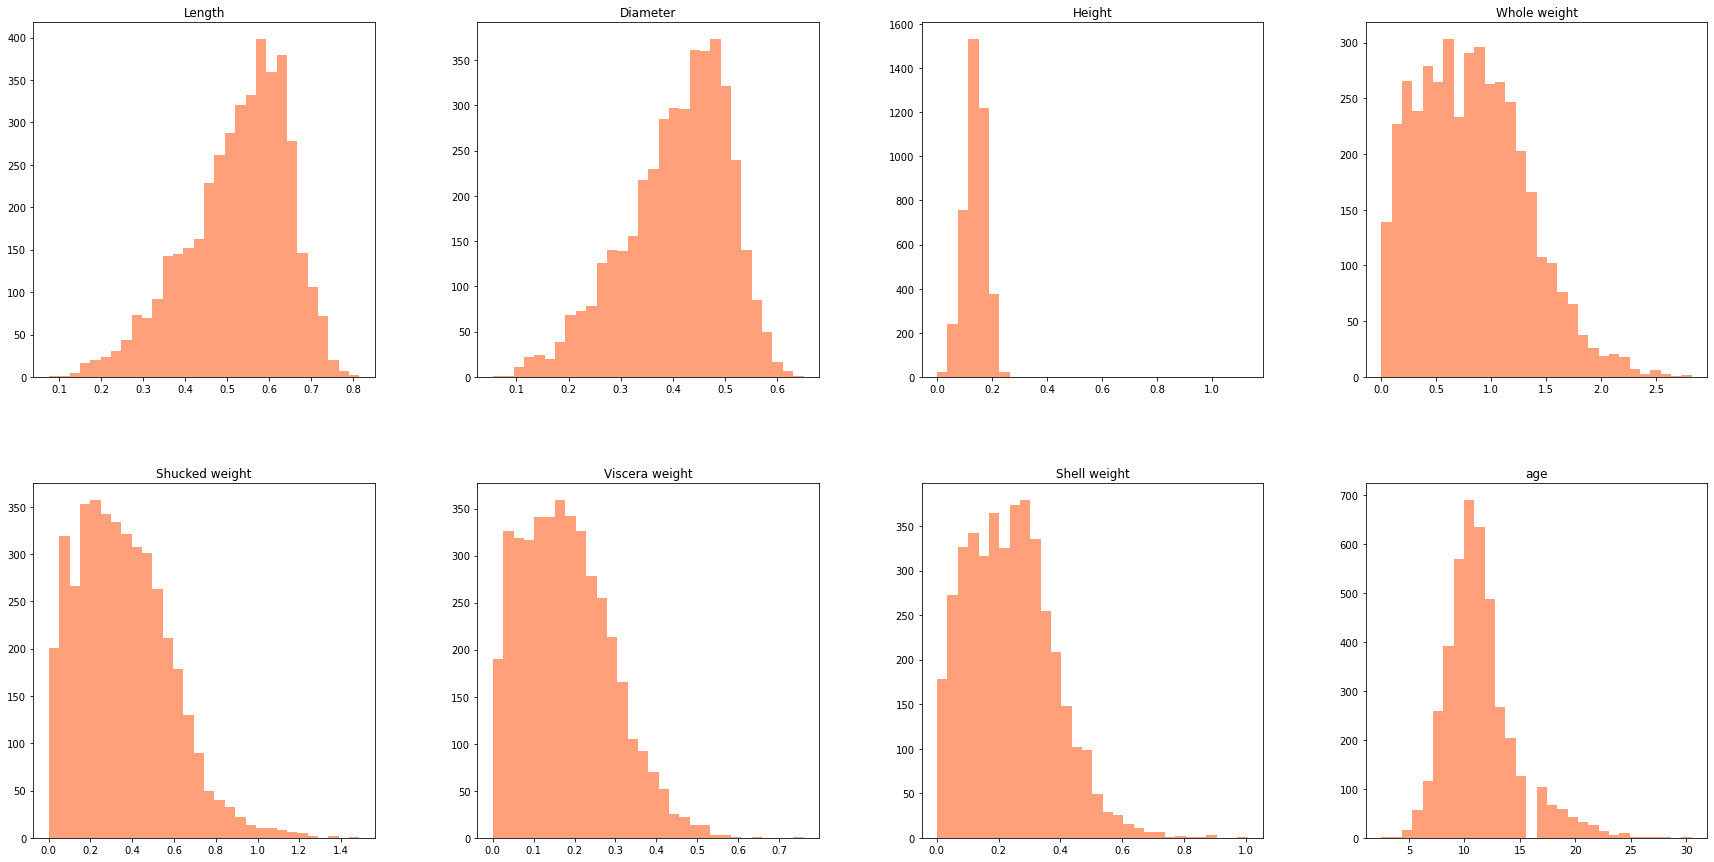

In [10]:
#visualize the data
data.hist(figsize=(30,15), grid=False, layout=(2, 4), bins = 30, color="lightsalmon")

<AxesSubplot:xlabel='Sex', ylabel='count'>

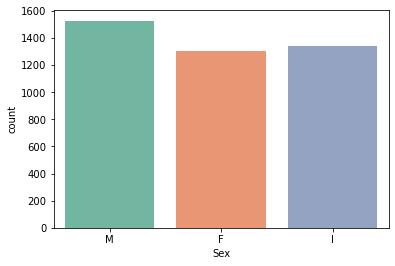

In [11]:
#sex distribution
sns.countplot(x='Sex', data= data, palette="Set2")

<AxesSubplot:>

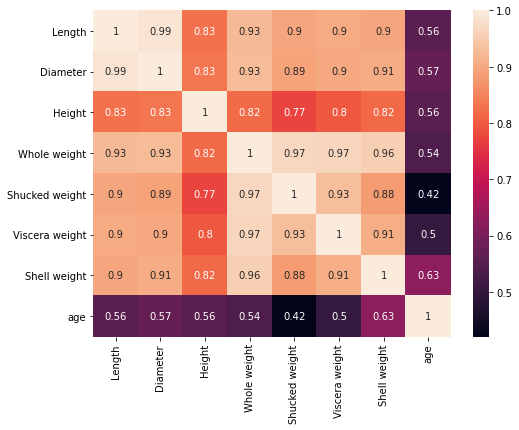

In [12]:
#seaborn map for correlation between different factors
plt.figure(figsize = (8,6))
corr = data.corr()
sns.heatmap(corr, annot = True)

In [ ]:
#better visualizatiuon of correlations
sns.pairplot(data[data.select_dtypes(include=[np.number]).columns], kind="hist", corner=True)

It appears that there are linear relationships between:
Length vs Diameter
Whole weight vs Viscera Weight
Whole weight vs Shucked Weight

## Implementation of Multivariable linear regression

In [ ]:
#drop categorical 'Sex' col
data.drop('Sex', axis = 1, inplace = True)
data.head()

In [ ]:
X= data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
Y = data['age']

In [ ]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

In [ ]:
# begin training model
# Modeling using sklearn package:

from sklearn import linear_model
regr = linear_model.LinearRegression()

# X_train = np.array(train[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']])
# y_train = np.array(train['age'])

# X_test = np.array(test[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']])
# y_test = np.array(test['age'])

regr.fit(X_train,y_train)

In [ ]:
#find coefficients to see which measure has the most significant effect on output var
coeff_data = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficients'])
coeff_data

In [ ]:
Y_pred = regr.predict(X_test)

In [ ]:
# Accuracy of the multivariable regression model:

from sklearn.metrics import r2_score

R = r2_score(y_test,Y_pred)
print(R)

## Classification Machine Learning

In [ ]:
df= data.copy()

In [ ]:
df['age'].mean()

In [ ]:
#create bins, essentially, for classification
Age=[]
for i in df['age']:
    if i>11.43:
        Age.append('1')
    else:
        Age.append('0')
df['Age'] = Age
df.drop('age', axis = 1, inplace=True)
df

In [ ]:
df['Age'].value_counts()

In [ ]:
X = df.drop('Age', axis = 1).values
y = df['Age'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#transform the data
scaled_features = scaler.fit_transform(df.drop('Age',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-1])
df_feat

In [ ]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['Age'],test_size=0.30)

## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
accuracy_score(y_test,pred)

In [ ]:
#choosing k model
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,c='blue',ls='--',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,pred))

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

In [ ]:
print("Model accuracy: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

In [ ]:
# Check for overfitting and underfitting:

print('Training Set Score:{:.2f}'.format(clf_gini.score(X_train,y_train)))
print('Test Set Score:{:.2f}'.format(clf_gini.score(X_test,y_test)))

In [ ]:
# Plot Decission tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

## SVM

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

# Inline Dashboard